# Visualizing Distributions

### Build a line

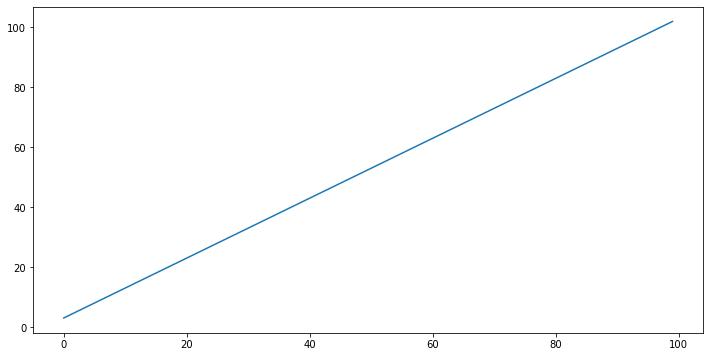

In [1]:
import numpy as np
import matplotlib.pyplot as plt

line = np.array([i + 3 for i in range(100)])
figure = plt.figure(figsize = (12,6))
plt.plot(line)

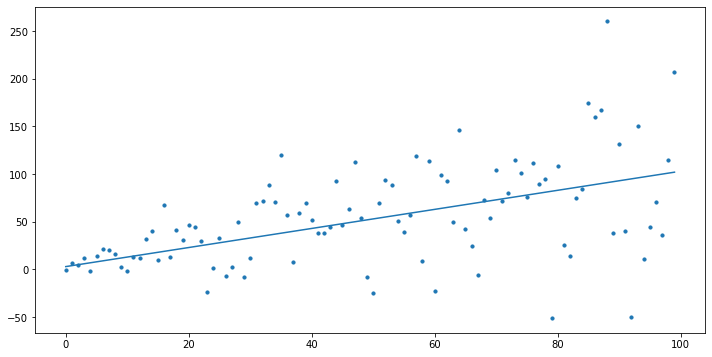

In [2]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, point))
    
    

figure = plt.figure(figsize = (12,6))
plt.plot(line)
plt.scatter(x = np.arange(len(points)), y = points, s = 10)



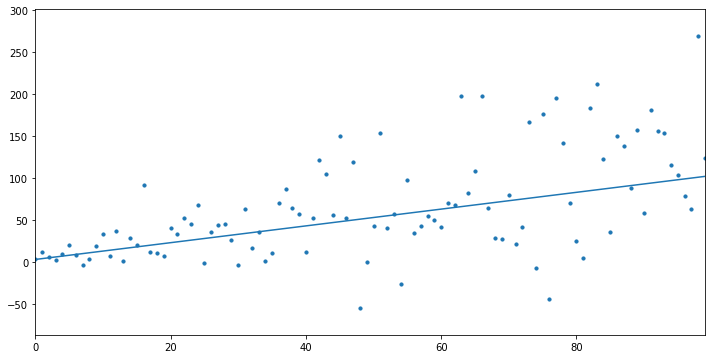

In [3]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, point))
    
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.1

figure = plt.figure(figsize = (12,6))
plt.plot(line)
plt.scatter(x = np.arange(len(points)), y = points, s = 10)

Text(0.5, 1.0, 'Randomly Generated Points')

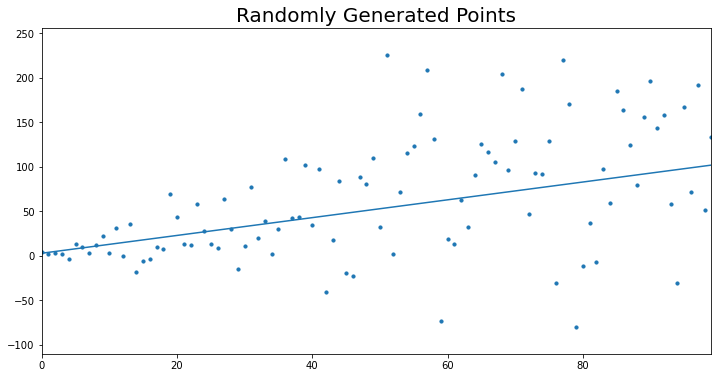

In [4]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, point))
    
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.1

figure = plt.figure(figsize = (12,6))
plt.plot(line)
plt.scatter(x = np.arange(len(points)), y = points, s = 10)
plt.title("Randomly Generated Points", fontsize = 20)

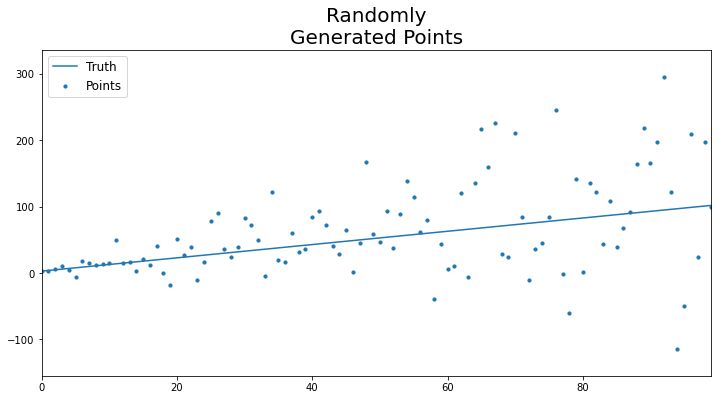

In [5]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, point))
    
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.1

figure = plt.figure(figsize = (12,6))
plt.plot(line, label  = "Truth")
plt.scatter(x = np.arange(len(points)), y = points, s = 10, label = "Points")
plt.title("Randomly\nGenerated Points", fontsize = 20)
plt.legend(fontsize = 12, loc="best")

## Monte Carlo Simulation

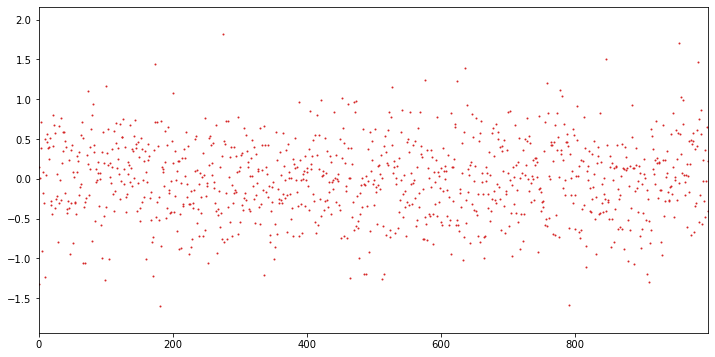

In [6]:
#build list of points drawn from a standard normal distribution and plot it in a figure

random_list = []
sim_length = 1000
mean = 0
sigma = 0.5

for i in range(sim_length):
    random_list.append(random.normalvariate(mean, sigma))
figure = plt.figure(figsize = (12,6))
plt.plot(random_list, ls = "", marker = ".", markersize = 2, color = "C3")
plt.show()
plt.close()

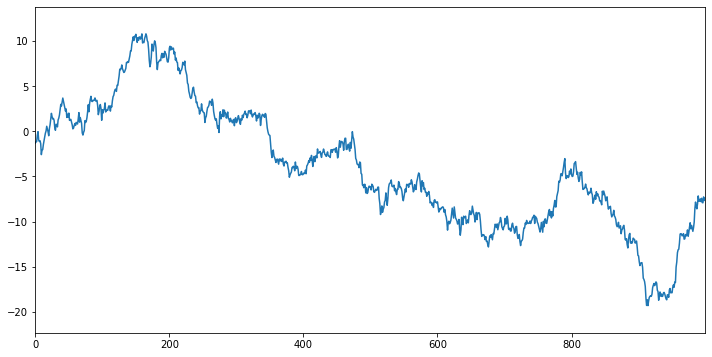

In [7]:
simulation = []

for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        simulation.append(simulation[i - 1] + val)

figure = plt.figure(figsize = (12,6))
plt.plot(simulation)
plt.show()
plt.close()

## Dr Caton, I reduced the number of simulations and periods for faster and save space to be able to upload on github. I was initially struggling to upload due to the size.

In [8]:
monte_carlo_sim_dict = {}
num_sims = 500
periods = 200
for i in range(num_sims):
    monte_carlo_sim_dict[i] = {}
    for period in range(periods):
        
        #create variable for current simulation
        curr_sim = monte_carlo_sim_dict[i]
        if period == 0:
            curr_sim[period] = random.normalvariate(mean, sigma)
        else:
            curr_sim[period] = curr_sim[period - 1] + random.normalvariate(mean, sigma)
monte_carlo_sim_dict

{0: {0: -0.7415195777083428,
  1: -0.3336091318622292,
  2: -0.341621465091242,
  3: -0.028046473762384616,
  4: 0.9264586131264563,
  5: 1.1422146638606838,
  6: 0.8552932227429979,
  7: 0.6752392722663484,
  8: 1.276215454597007,
  9: 0.8018435043705823,
  10: 1.1362990465366098,
  11: 1.0475324498963448,
  12: 1.5658279208494628,
  13: 1.81162681289707,
  14: 2.586822296702685,
  15: 1.8619448424077452,
  16: 1.7173745117037624,
  17: 0.7517273684103225,
  18: -0.03283653588063484,
  19: 0.2434425765663374,
  20: 0.9287378287800767,
  21: 1.1803105850446758,
  22: 1.1426496731280837,
  23: 1.1162432143642373,
  24: 1.3072177813644494,
  25: 2.326691921878273,
  26: 2.2354851806041034,
  27: 2.3974510475517103,
  28: 2.968754430189667,
  29: 1.9856919217592064,
  30: 1.8799417726425633,
  31: 1.6018353699384138,
  32: 1.1777211645873429,
  33: 1.124496057015628,
  34: 0.1142284030268843,
  35: 1.0532709702535092,
  36: 0.8738263717480339,
  37: 1.4621459304576958,
  38: 0.56571506415

In [9]:
import pandas as pd

monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict)

<AxesSubplot:>

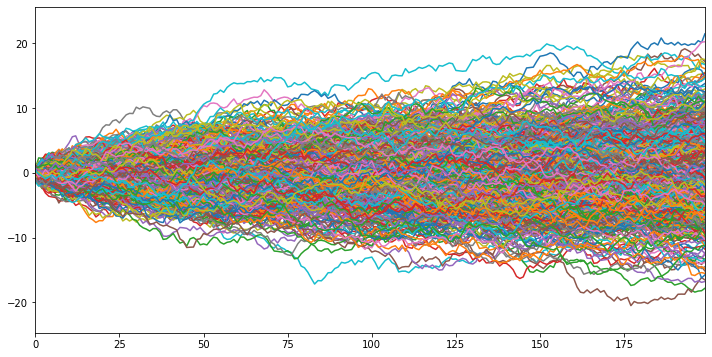

In [10]:
fig, ax = plt.subplots(figsize = (12,6))
monte_carlo_sim_df.plot.line(legend = False, ax = ax)

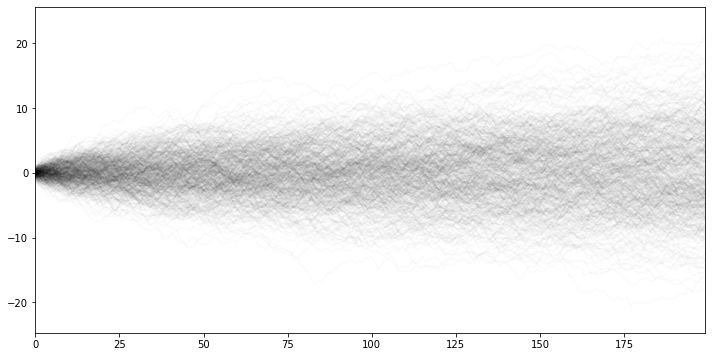

In [11]:
fig, ax = plt.subplots(figsize = (12,6))
monte_carlo_sim_df.plot.line(legend = False,
                             color = "k",
                             alpha = .02,                       
                             ax = ax)

plt.show()
plt.close()

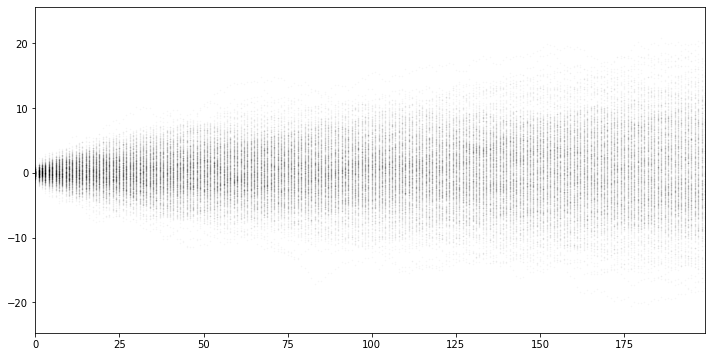

In [12]:
fig, ax = plt.subplots(figsize = (12,6))
monte_carlo_sim_df.plot.line(legend = False,
                             ls = "",
                             marker = ".",
                             markersize = 2,
                             color = "k",
                             alpha = .02,                       
                             ax = ax)

plt.show()
plt.close()

In [13]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

#the use of _ after the 2nd mean is telling the system its a variable name not the same as the function

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #next is for list with even number length, this is divided by 2 with no reminder, 0
    if n % 2 !=0:
        #next is for odd length list
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        #pass slice with two middle values to mean(the mean of the two middle index)
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
    return median_


def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    #population variance of lis = sum(xi - list_mean)**2)/n for all xi in list. first we save the mean of the list
    list_mean = mean(list_obj)
    #tge n will be used to calculate the average of sum of squared difference
    n = len(list_obj)
    #create vale that the squared differnces will be added to
    sum_sq_diff = 0
    for val in list_obj:
        #this will add each squared difference to the sum_sq_diff variable
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        #normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n-1)
        
    return variance_

def SD(list_obj, sample = False):
    #standard deviation is the square root of variance
    SD_ = variance(list_obj) ** 1/2
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    #first find the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    #instantiate(express) a variable holding the value of 0:
    #this will be used to sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    #the list lenght must be equal hence check
    if n1 == n2:
        n = n1
        #sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        #account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        #return covariance
        return cov
    else:
        print("List lenghts are not equal")
        print("List1:", n1)
        print("List2:", n1)
        
def correlation (list_obj1, list_obj2):
    # correlation(x,y) = cov(x,y) / (SD(x) 8 SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n* skew / ((n-1)*(n-2) * SD_ ** 3)
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [14]:
lst = [1,2,2,3,4,5,6,7,8,9]
lst1 = [2,3,4,2,3,9,8,7,8,8]

print("total:", total(lst))
print("mean:", mean(lst))
print("median:", median(lst))
print("mode:", mode(lst))
print("variance:", variance(lst))
print("SD:", SD(lst))
print("covariance:", covariance(lst, lst1))
print("correlation:", correlation(lst, lst1))
print("skewness:", skewness(lst))
print("kurtosis:", kurtosis(lst))

total: 47
mean: 4.7
median: 4.5
mode: [2]
variance: 6.8100000000000005
SD: 3.4050000000000002
covariance: 5.82
correlation: 0.47216881251977527
skewness: 0.08754319346113891
kurtosis: 0.5903947640065732
